# Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,068 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

Masked data:-keeps sensitive information private by making it unrecognizable but still usable.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#Shape of a dataset
df.shape

(550068, 12)

#### There are total 550068 rows and 12 columns in black friday sale dataset.

### Unique Element in each attribute

In [4]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### statistical info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### By Observing info() we can say that:-
    1.Datatype of Age should be numeric.
    2.Product_Category_2 contains null values.
    3.Product_category_3 contains null values.

### Checking Null Values()

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### There are 173638 null values in  Product_Category_2 and 383247 null values in Product_Category_3

### Null value in Percentage

In [7]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

#### There are 31.56% null values in Product_Category_2 and 69.67 null values in Product_Category_3

### Exploratory data Analysis 

In [8]:
import warnings
warnings.filterwarnings('ignore')

#### Target Variable-Purchase

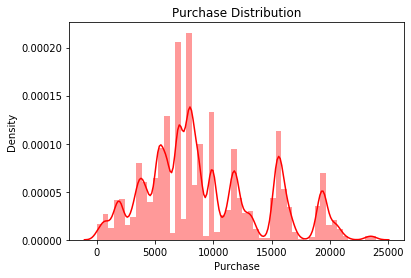

In [9]:
sns.distplot(df["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

### Gender

In [10]:
df.groupby('Gender').size()

Gender
F    135809
M    414259
dtype: int64

#### There are more male than female

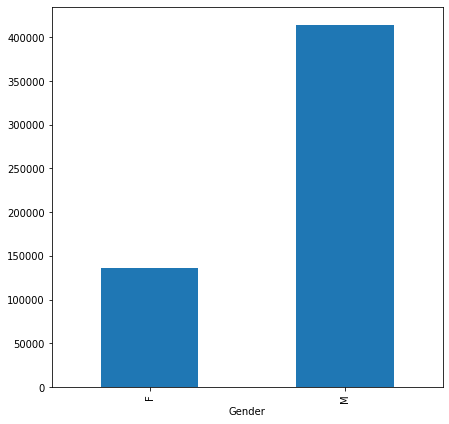

In [11]:
df.groupby('Gender').size().plot(kind='bar',figsize=(7,7))

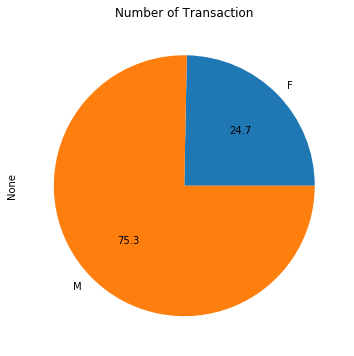

In [12]:
df.groupby('Gender').size().plot(kind='pie',autopct="%.1f",title="Number of Transaction",figsize=(6,6))

In [13]:
df.groupby('Gender').sum()['Purchase']

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

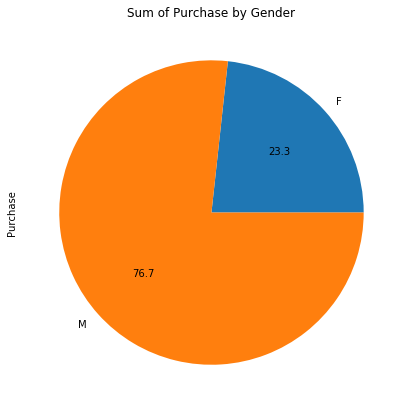

In [14]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%.1f",title='Sum of Purchase by Gender',figsize=(7,7))

#### THE SUM OF PURCHASE BY MALE IS MORE THAN FEMALE

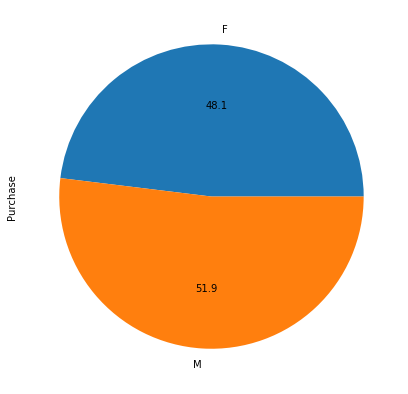

In [15]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f",figsize=(7,7))

#### THE MEAN PURCHASE OF MALE IS 51.9 ANF FEMALE IS 48.1.

### Age

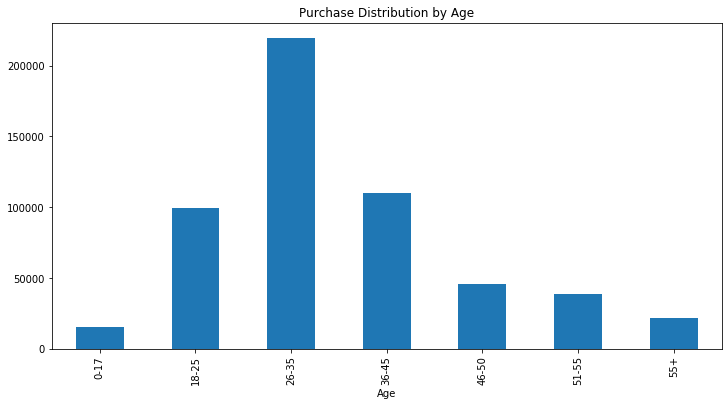

In [16]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

#### PEOPLE WITHIN THE AGES OF 26 TO 35 HAVE PURCHASED THE MOST(IN NUMBER AND AMOUNT)

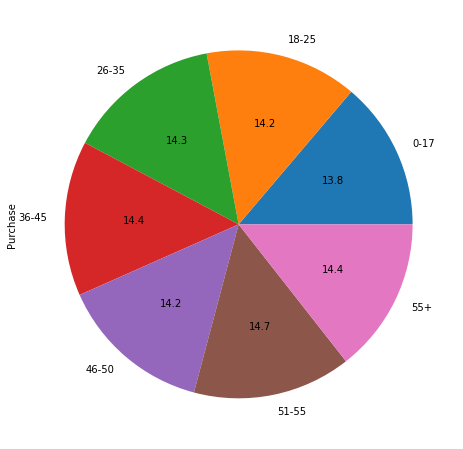

In [17]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

 #### PEOPLE IN DIFFERENT AGES HAVE NEARLY SAME MEAN PURCHASE AMOUNT.

### Maritial Status

In [18]:
df.groupby('Marital_Status').size()

Marital_Status
0    324731
1    225337
dtype: int64

#### 0-UnMarried  1-Married

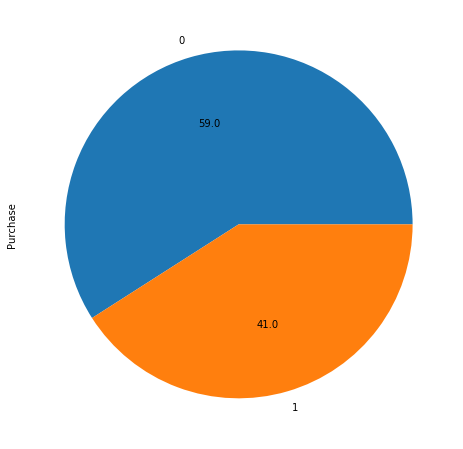

In [19]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

#### UNMARRIED PEOPLE HAVE PURCHASED MORE THAN MARRIED PEOPLE.

### COUNTPLOT ON AGE,GENDER,MARITAL_STATUS

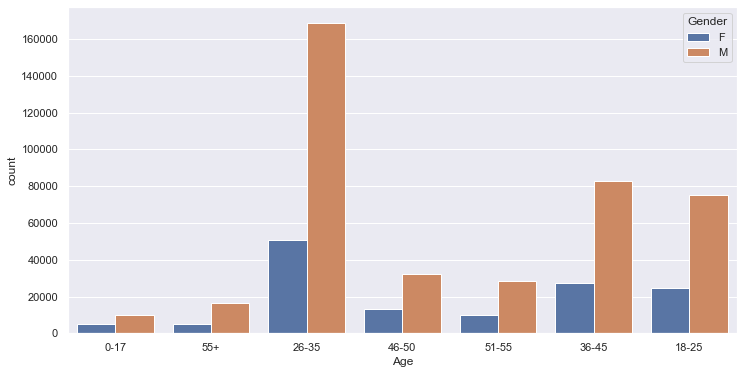

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

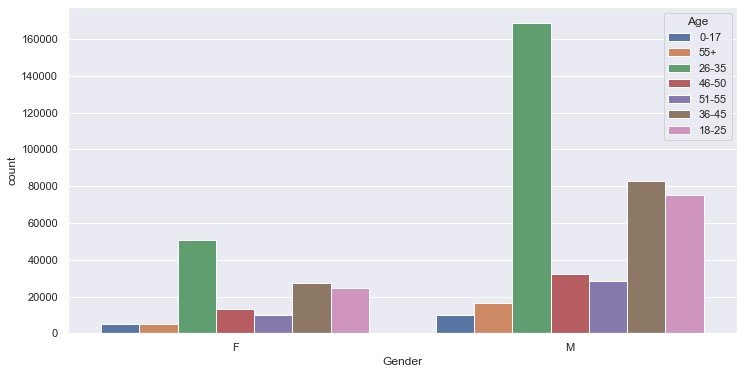

In [21]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

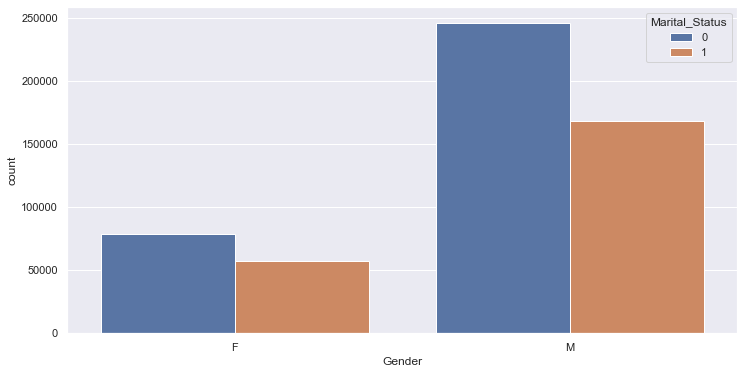

In [22]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

#### 0-UnMarried  1-Married

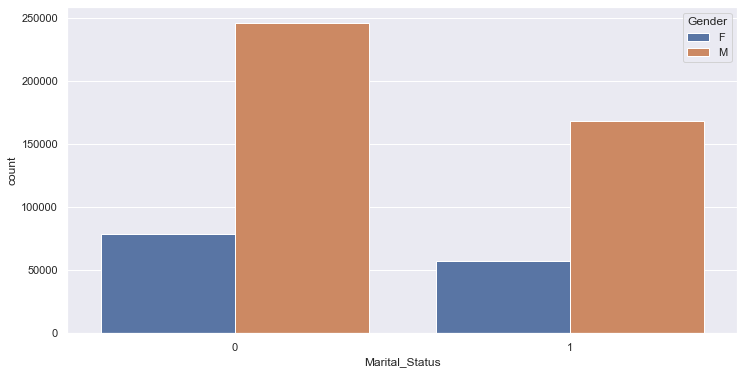

In [23]:
sns.rc=({'figure.figsize':(12,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

### City_Category

In [24]:
df.groupby('City_Category').size()

City_Category
A    147720
B    231173
C    171175
dtype: int64

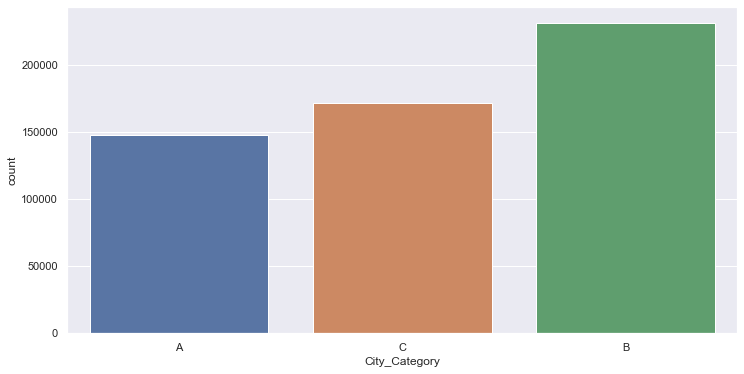

In [25]:
sns.countplot(x=df['City_Category'])

#### FREQUENCY OF PEOPLE FROM CITY B IS MORE THAN C AND A 
#### FREQUENCY OF PEOPLE FROM CITY C IS MORE THAN A

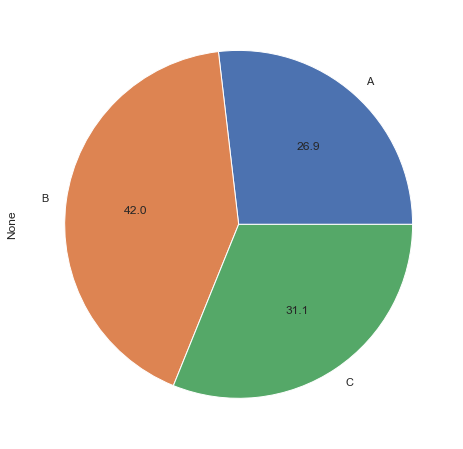

In [26]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%0.1f',figsize=(8,8))

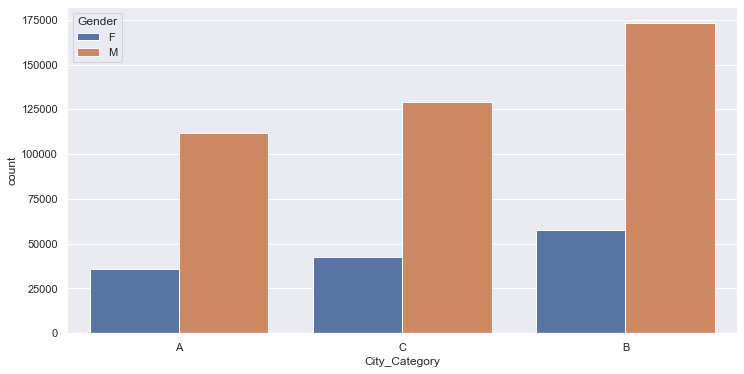

In [27]:
sns.countplot(x='City_Category',hue='Gender',data=df)

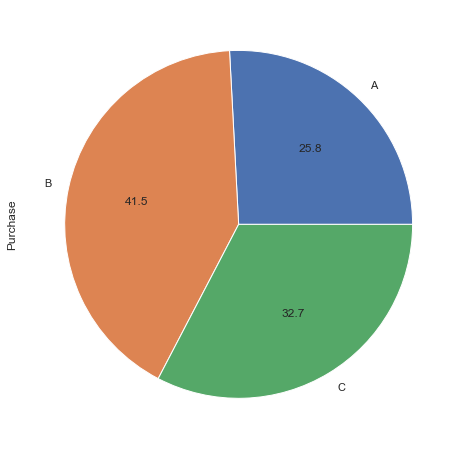

In [28]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

#### THE SUM OF PURCHASE OF PEOPLE FROM CITY B >C>A

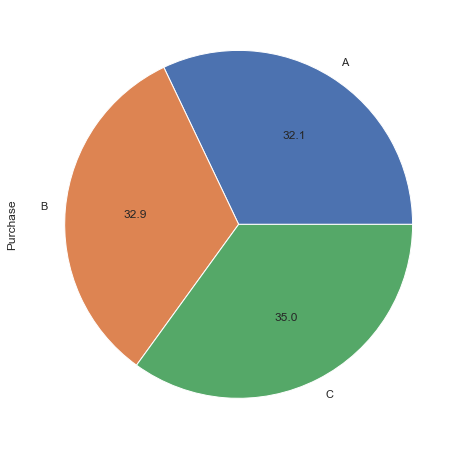

In [29]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

#### THE MEAN PURCHASE OF PEOPLE FROM CITY C >B>A

### Stay_In_Current_City_Years

In [30]:
df.groupby('Stay_In_Current_City_Years').size()

Stay_In_Current_City_Years
0      74398
1     193821
2     101838
3      95285
4+     84726
dtype: int64

In [31]:
df.groupby('Stay_In_Current_City_Years').sum()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Stay_In_Current_City_Years,,,,,,,
0,74625450658,568920,29490,405455,497683.0,283562.0,682979229
1,194416939046,1561850,83125,1053792,1308012.0,739059.0,1792872533
2,102153298302,804795,41038,544473,686580.0,397588.0,949173931
3,95562471663,804857,37638,505937,640962.0,370501.0,884902659
4+,84975909613,702316,34046,463059,571711.0,322619.0,785884390


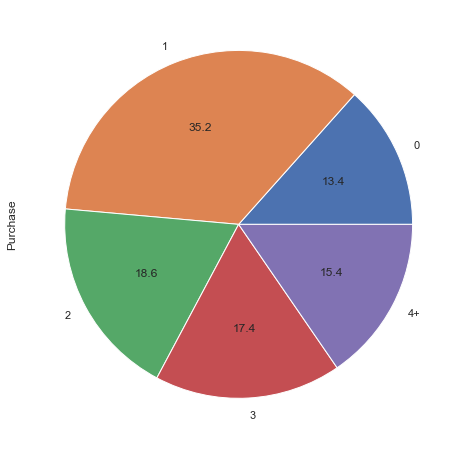

In [32]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

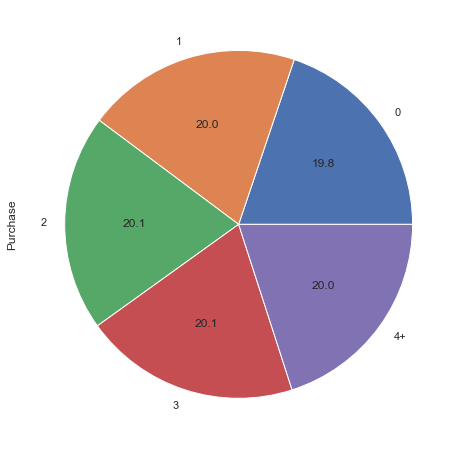

In [33]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind='pie',autopct='%0.1f',figsize=(8,8))

### Occupation

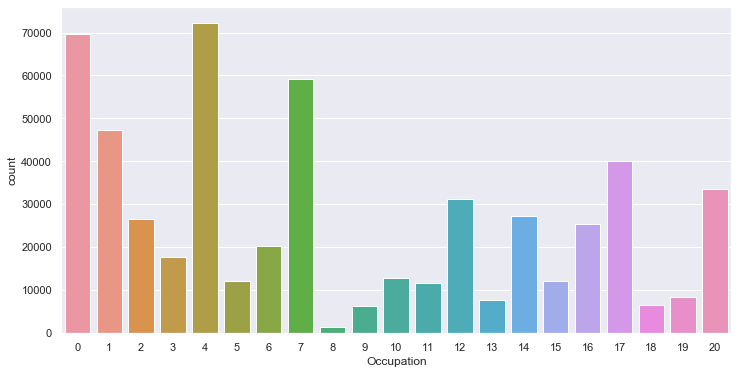

In [34]:
sns.countplot(x='Occupation',data=df)

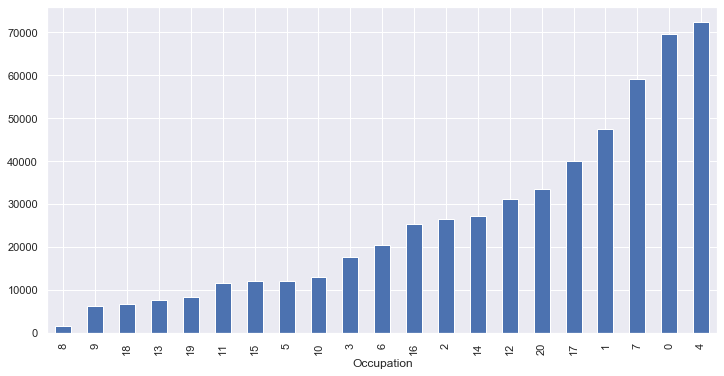

In [35]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

In [36]:
df.groupby('Occupation').sum()['Purchase'].sort_values()

Occupation
8      14737388
9      54340046
18     60721461
13     71919481
19     73700617
11    106751618
5     113649759
10    115844465
15    118960211
3     162002168
6     188416784
2     238028583
16    238346955
14    259454692
20    296570442
12    305449446
17    393281453
1     424614144
7     557371587
0     635406958
4     666244484
Name: Purchase, dtype: int64

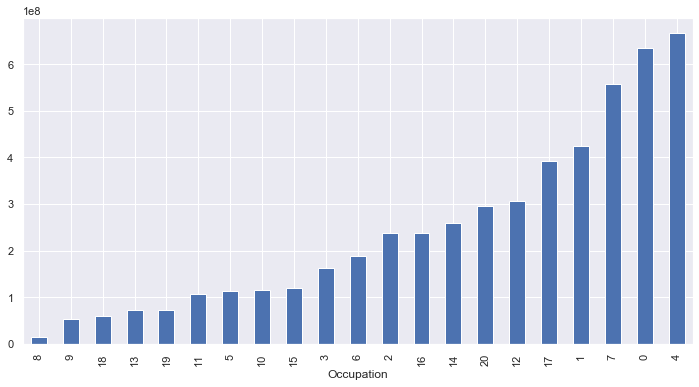

In [37]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

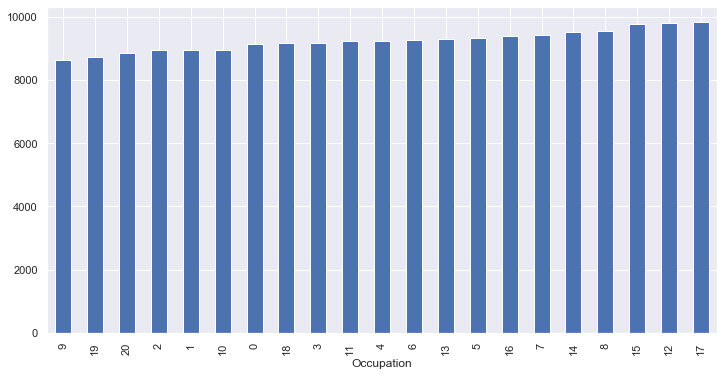

In [38]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

### Product_category_1

In [39]:
df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

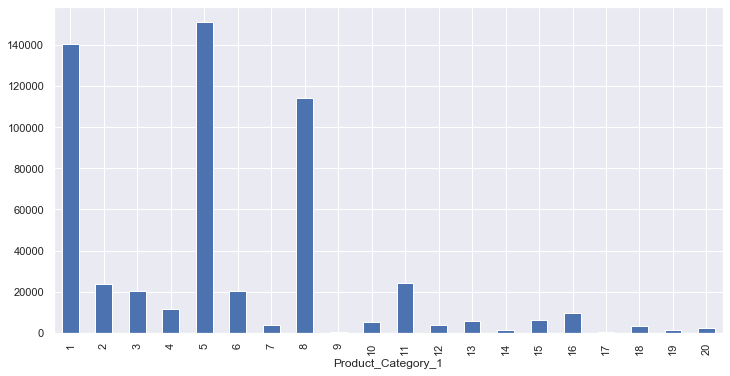

In [40]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

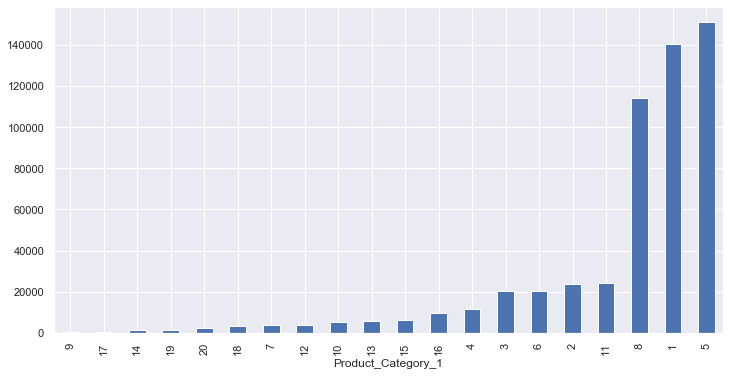

In [41]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

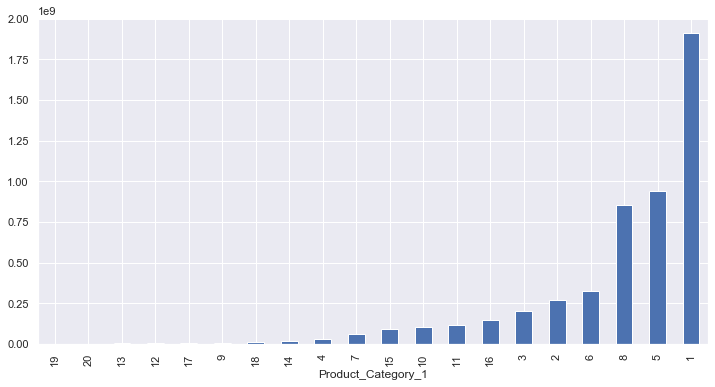

In [42]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

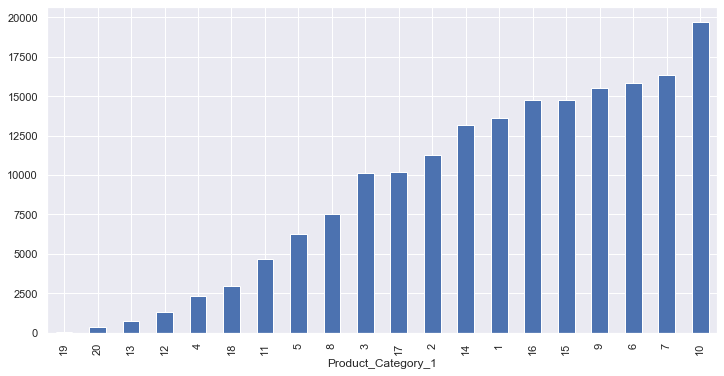

In [43]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

In [55]:
!pip install missingno

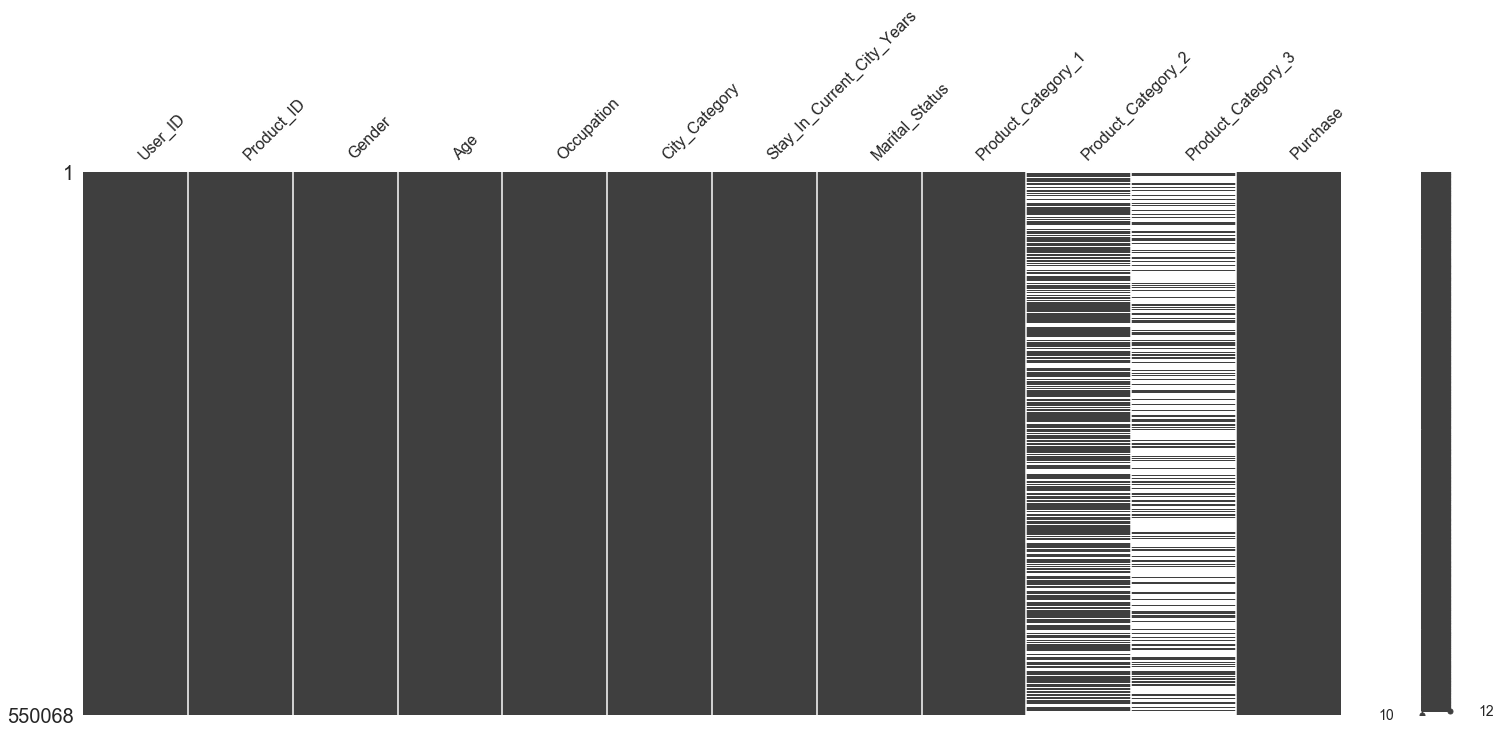

In [56]:
import missingno as msno
msno.matrix(df)

In [57]:
df.drop(['Product_Category_3','Product_Category_2','User_ID','Product_ID'],axis=1,inplace=True)

In [58]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,368
550064,F,26-35,1,C,3,0,20,371
550065,F,26-35,15,B,4+,1,20,137
550066,F,55+,1,C,2,0,20,365


In [59]:
#Converting Categorical data into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in df.columns:
    df[x]=le.fit_transform(df[x])

In [60]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0,10,0,2,0,2,6702
1,0,0,10,0,2,0,0,12121
2,0,0,10,0,2,0,11,586
3,0,0,10,0,2,0,11,494
4,1,6,16,2,4,0,7,6301
...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,19,126
550064,0,2,1,2,3,0,19,129
550065,0,2,15,1,4,1,19,34
550066,0,6,1,2,2,0,19,123


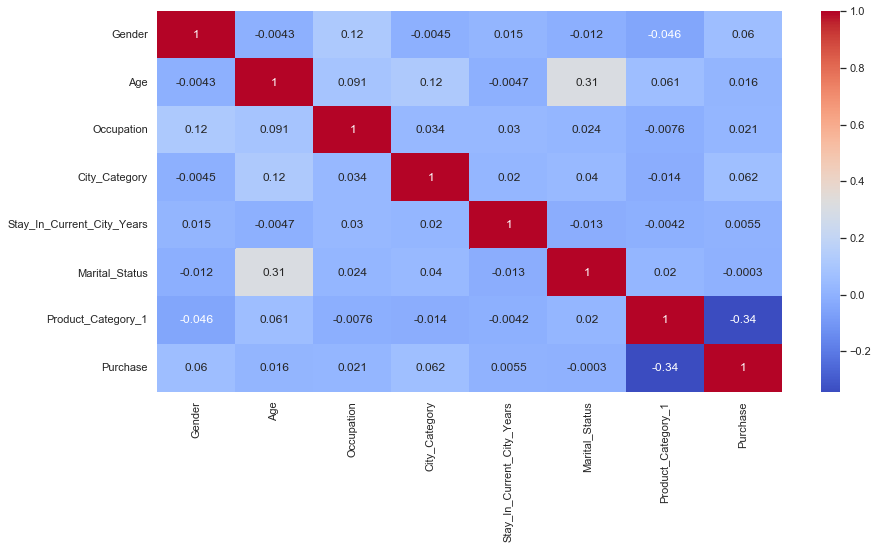

In [61]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [62]:
X=df.iloc[:,:-1]

In [63]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,0,0,10,0,2,0,2
1,0,0,10,0,2,0,0
2,0,0,10,0,2,0,11
3,0,0,10,0,2,0,11
4,1,6,16,2,4,0,7
...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,19
550064,0,2,1,2,3,0,19
550065,0,2,15,1,4,1,19
550066,0,6,1,2,2,0,19


In [64]:
Y=df.iloc[:,-1]

In [65]:
Y

0          6702
1         12121
2           586
3           494
4          6301
          ...  
550063      126
550064      129
550065       34
550066      123
550067      186
Name: Purchase, Length: 550068, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)
X=scaler.transform(X)

In [67]:
X

array([[-1.74651251, -1.84424754,  0.29486356, ...,  0.10980142,
        -0.83301799, -0.61080871],
       [-1.74651251, -1.84424754,  0.29486356, ...,  0.10980142,
        -0.83301799, -1.11891197],
       [-1.74651251, -1.84424754,  0.29486356, ...,  0.10980142,
        -0.83301799,  1.67565594],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  1.66086068,
         1.20045427,  3.70806897],
       [-1.74651251,  2.58827703, -1.08494277, ...,  0.10980142,
        -0.83301799,  3.70806897],
       [-1.74651251,  1.11076884, -1.23825458, ...,  1.66086068,
         1.20045427,  3.70806897]])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,Y_train)


LinearRegression()

In [70]:
Y_pred=lr.predict(X_test)
print(Y_pred)

[6541.59147166 7426.26469589 5990.79217221 ... 6422.39375136 7492.78247714
 7857.19497541]


In [71]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.12334564688078398
RMSE: 3837.492154037254
Adj R-square: 0.12333449067878455


### USing Ridge

In [72]:
from sklearn.linear_model import Ridge
lm1=Ridge(alpha=1.0)
lm1.fit(X_train,Y_train)

#print intersect and coefficients
print(lm1.intercept_)
print(lm1.coef_)

7281.685108798257
[  178.21263287   130.36368526    33.37484347   220.37463097
     5.90650456   -21.24351156 -1400.5371842 ]


In [73]:
Y_pred1=lm1.predict(X_test)
print(Y_pred1)

[6541.59381947 7426.26457713 5990.79548071 ... 6422.39567728 7492.78242829
 7857.19291664]


In [74]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred1)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred1))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.12334564863246877
RMSE: 3837.4921502033158
Adj R-square: 0.12333449243049155


### USing Lasso

In [75]:
from sklearn.linear_model import Lasso
lm2=Lasso()
lm2.fit(X_train,Y_train)

#print intersect and coefficients
print(lm2.intercept_)
print(lm2.coef_)

7281.684990884542
[  177.37093235   129.02075961    32.62634188   219.53763414
     4.9777402    -19.81730526 -1399.54789293]


In [76]:
Y_pred2=lm2.predict(X_test)
print(Y_pred1)

[6541.59381947 7426.26457713 5990.79548071 ... 6422.39567728 7492.78242829
 7857.19291664]


In [77]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred2)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred2))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.12334461989853174
RMSE: 3837.494401807522
Adj R-square: 0.1233334636834631


### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree=DecisionTreeRegressor(random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

#Predict
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[5909.82142857 4074.31034483 5498.32       ... 6496.14285714 4924.3442623
 9284.55555556]


In [107]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6459102595406381
RMSE: 2438.87743461011
Adj R-square: 0.6459057534355164


### Pruning

In [112]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree=DecisionTreeRegressor(max_depth=50,min_samples_leaf=10,max_leaf_nodes=300,random_state=10)

#fit the data on the model and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)

In [113]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6445943986848899
RMSE: 2443.404884853366
Adj R-square: 0.644589875834275


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor()

#fit the data on the model and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#print(Y_pred)  

In [77]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6535295290455743
RMSE: 2412.4949721303938
Adj R-square: 0.6535251199023959


### Pruning

In [85]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest=RandomForestRegressor(n_estimators=51,random_state=10)

#fit the data on the model and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
#print(Y_pred)

In [86]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6535653448072551
RMSE: 2412.370275243737
Adj R-square: 0.653560936119864


### Extra Tree Regressor

In [87]:
#Predicting using the Bagging_Classifier
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=10,random_state=10)

#fit the data on the model and predict the values
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)
#print(Y_pred)


In [89]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6489554653311478
RMSE: 2428.3674990648606
Adj R-square: 0.6489509979789632


### Gradient Boosting

In [90]:
#predicting using the Gradient_Boosting Classifier
from sklearn.ensemble import GradientBoostingRegressor

model_GradientBoosting=GradientBoostingRegressor(n_estimators=100,random_state=10)
#fit the data on the model to predict the values
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)
#print(Y_pred)

In [91]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6385965806025878
RMSE: 2463.9360532415158
Adj R-square: 0.6385919814244332


### KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=8,metric='euclidean')

#fit the data on the model and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(Y_pred)

In [115]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5732038663061394
RMSE: 2677.5866989484434
Adj R-square: 0.5731984349478587


### AdaBoostRegressor

In [116]:
#predicting using the Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the data on the model to predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)
#print(Y_pred)

In [117]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6315817232774794
RMSE: 2487.7336871228968
Adj R-square: 0.631577034829061


### XGBRegressor

In [118]:
#predicting using the XGBRegressor
from xgboost import XGBRegressor

model_XGBRegressor=XGBRegressor(n_estimators=100,random_state=10)  #bydefault n_estimators=100

#fit the data on the model to predict the values
model_XGBRegressor.fit(X_train,Y_train)
Y_pred=model_XGBRegressor.predict(X_test)
#print(Y_pred)

In [119]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6546166856618788
RMSE: 2408.7070295032413
Adj R-square: 0.6546122903537299


#### Conclusion:-
                        Model                R2_score
                     Linear Regression         0.1233
                     Ridge                     0.1233
                     Lasso                     0.1233
                     Decision Tree             0.6459
                     Decision Tree Pruning     0.6445
                     Random Forest             0.6535
                     Random Forest Pruning     0.6535
                     Extra Tree Regressor      0.6489
                     Gradient Boosting         0.6385
                     KNN                       0.5732
                     AdaBoostRegressor         0.6315
                     XGBRegressor              0.6546
#### XGBRegressor giving me R2_score=0.6546 and Random Forest is giving 0.6535. So,for simplicity and not making our model complex we will go with Random Forest.